In [3]:
import scipy
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from skimage import io, color
image = io.imread('/Users/ooxoo/Desktop/Projet DATA/Datasets/Painting/painting_00001.jpg')
grey_image = color.rgb2gray(image)
grey_image

array([[1.        , 0.98431373, 1.        , ..., 0.99215686, 1.        ,
        1.        ],
       [0.98039216, 0.04705882, 0.        , ..., 0.01176471, 0.01568627,
        0.98039216],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.45098039, 0.69411765,
        1.        ],
       [0.98039216, 0.04705882, 0.        , ..., 0.79607843, 0.85490196,
        0.98431373],
       [1.        , 0.98431373, 1.        , ..., 0.99607843, 0.98823529,
        1.        ]])

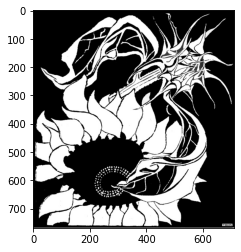

In [25]:
plt.imshow(image)
plt.show()

In [26]:
from scipy import ndimage

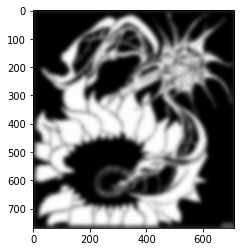

In [35]:
gaussian_image = ndimage.gaussian_filter(image, sigma=7)
plt.imshow(gaussian_image)
plt.show()

(array([0.04573624, 0.00033226, 0.0003419 , 0.00036161, 0.00043539,
        0.00031141, 0.00025804, 0.00021576, 0.00022741, 0.00022367,
        0.00022007, 0.0001936 , 0.00021935, 0.0002333 , 0.00023819,
        0.00023517, 0.00026265, 0.00031098, 0.00051566, 0.02755871]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

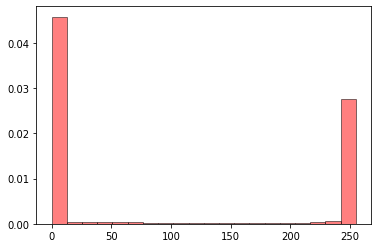

In [36]:
plt.hist(image.flatten(), bins=20, density=True, alpha=0.5, edgecolor='black', color='red', label='Image originale')

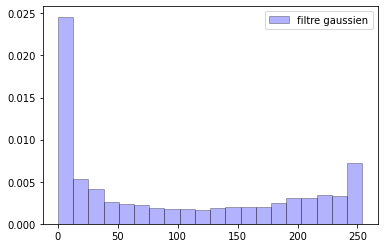

In [37]:
plt.hist(gaussian_image.flatten(), bins=20, density=True, alpha=.3, edgecolor='black', color='blue', label='filtre gaussien')
plt.legend()
plt.show()

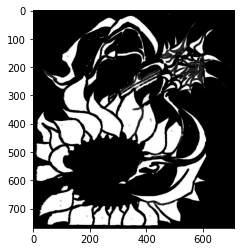

In [41]:
minimum_image = ndimage.minimum_filter(image, size=5)
plt.imshow(minimum_image)
plt.show()

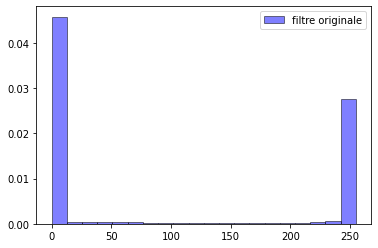

In [44]:
plt.hist(image.flatten(), bins=20, density=True, alpha=.5, edgecolor='black', color='blue', label='filtre originale')
plt.legend()
plt.show()

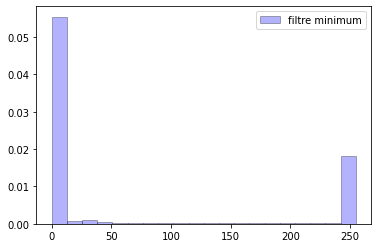

In [45]:
plt.hist(minimum_image.flatten(), bins=20, density=True, alpha=.3, edgecolor='black', color='blue', label='filtre minimum')
plt.legend()
plt.show()

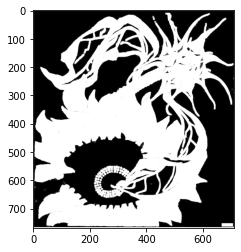

In [46]:
maximum_image = ndimage.maximum_filter(image, size = 5)
plt.imshow(maximum_image)
plt.show()

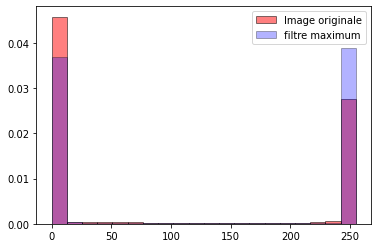

In [49]:
plt.hist(image.flatten(), bins=20, density=True, alpha=.5, edgecolor='black', color='red', label='Image originale')
plt.hist(maximum_image.flatten(), bins=20, density=True, alpha=.3, edgecolor='black', color='blue', label='filtre maximum')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogramme des pixels')

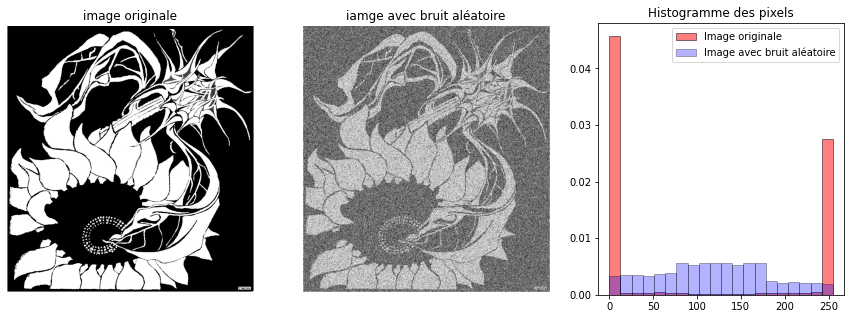

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].imshow(grey_image, cmap='Greys_r')
axs[0].set_title('image originale')
axs[0].set_axis_off()

noise_image = grey_image + 5 * grey_image.std() * np.random.random(grey_image.shape)
noise_image = np.uint8( ( noise_image / noise_image.max() ) * 255)
axs[1].imshow(noise_image, cmap='Greys_r')
axs[1].set_title('iamge avec bruit aléatoire')
axs[1].set_axis_off()

axs[2].hist(image.flatten(), bins=20, density = True, alpha = 0.5, edgecolor='black', color='red', label='Image originale')
axs[2].hist( noise_image.flatten(), bins=20, density=True, alpha=0.3, edgecolor='black', color='blue', label='Image avec bruit aléatoire')
axs[2].legend()
axs[2].set_title('Histogramme des pixels')

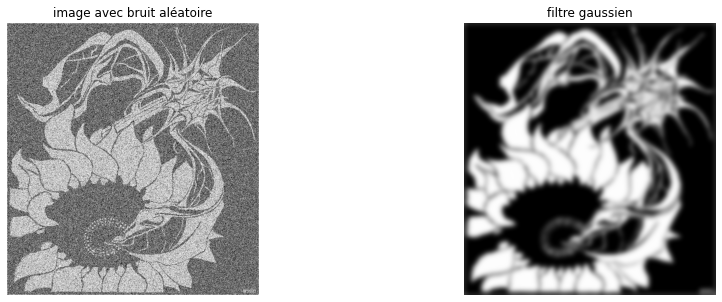

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(noise_image, cmap='Greys_r')
axs[0].set_title('image avec bruit aléatoire')
axs[0].set_axis_off()

guassian_image = ndimage.gaussian_filter( noise_image, 3)
axs[1].imshow( gaussian_image, cmap='Greys_r')
axs[1].set_title('filtre gaussien')
axs[1].set_axis_off()

Text(0.5, 1.0, 'Histogramme des pixels')

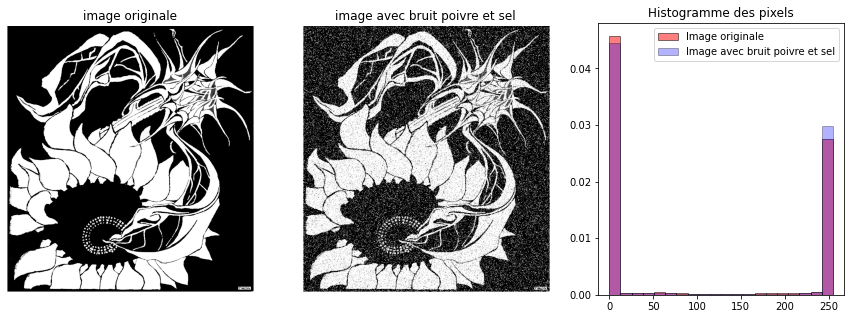

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].imshow(grey_image, cmap='Greys_r')
axs[0].set_title('image originale')
axs[0].set_axis_off()

x = grey_image.shape[0]
y = grey_image.shape[1]
noise = np.random.randint(10, size = (x,y))
noise_image = np.where(noise == 0, 0, grey_image*255)
noise_image = np.where(noise == 9, 255, noise_image)
noise_image = np.uint8(noise_image)
axs[1].imshow(noise_image, cmap='Greys_r')
axs[1].set_title('image avec bruit poivre et sel')
axs[1].set_axis_off()

axs[2].hist(image.flatten(), bins=20, density=True, alpha=.5, edgecolor='black', color='red', label='Image originale')
axs[2].hist(noise_image.flatten(), bins=20, density=True, alpha=0.3, edgecolor='black', color='blue', label='Image avec bruit poivre et sel')
axs[2].legend()
axs[2].set_title('Histogramme des pixels')

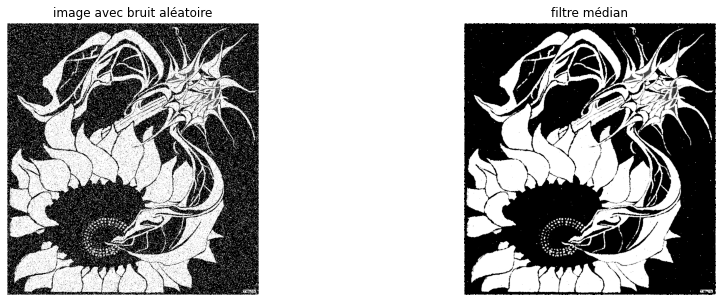

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(noise_image, cmap='Greys_r')
axs[0].set_title('image avec bruit aléatoire')
axs[0].set_axis_off()

median_image = ndimage.median_filter(noise_image, 3)
axs[1].imshow(median_image, cmap='Greys_r')
axs[1].set_title('filtre médian')
axs[1].set_axis_off()

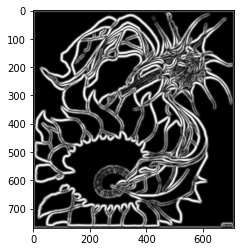

In [66]:
grey_image_gaussian = ndimage.gaussian_filter( grey_image*255, 3)

edges_image = grey_image_gaussian.astype('int32')
dx = ndimage.sobel(edges_image, 0)
dy = ndimage.sobel(edges_image, 1)
edges_image = np.hypot(dx,dy)

plt.imshow(edges_image, cmap='Greys_r')
plt.show()

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


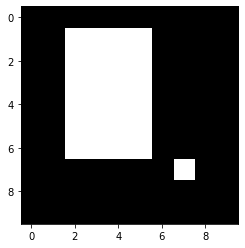

In [67]:
array = np.zeros((10,10), dtype=np.int)
array[1:7, 2:6] = 255
array[7,7] = 255
print(array)
plt.imshow( array, cmap='Greys_r')
plt.show()

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


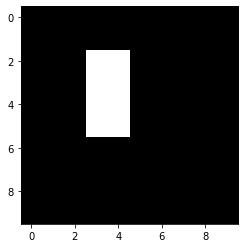

In [68]:
array_erosion = ndimage.binary_erosion( array )
print( array_erosion*255)
plt.imshow(array_erosion, cmap='Greys_r')
plt.show()

[[  0   0 255 255 255 255   0   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0]
 [  0 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


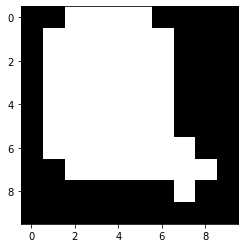

In [70]:
array_dilation = ndimage.binary_dilation(array)
print(array_dilation*255)
plt.imshow(array_dilation, cmap='Greys_r')
plt.show()

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


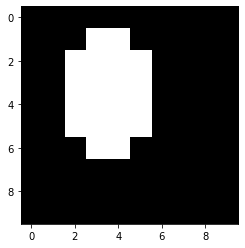

In [74]:
array_3 = ndimage.binary_opening( array )
print( array_3*255)
plt.imshow(array_3, cmap='Greys_r')
plt.show()

segmentation seuil = 50


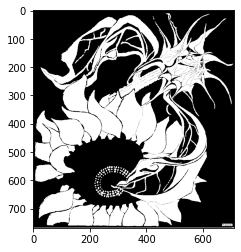

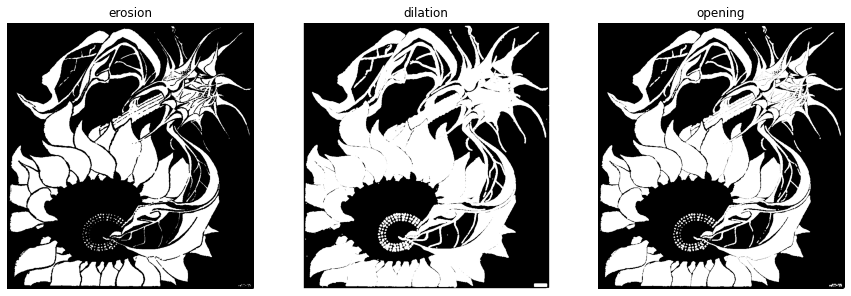

In [78]:
array_seg = grey_image*255 > 50

print('segmentation seuil = 50')
plt.imshow(array_seg, cmap='Greys_r')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

filtres = ['erosion', 'dilation', 'opening']
for i, filtre in enumerate(filtres):
    exec('test = ndimage.binary_'+filtre+'(array_seg)')
    axs[i].imshow(test, cmap='Greys_r')
    axs[i].set_title(filtre)
    axs[i].set_axis_off()

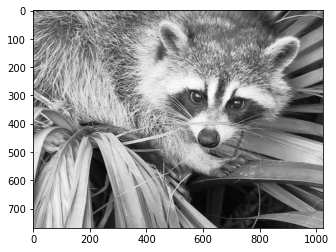

In [79]:
from scipy import misc

image = misc.face(gray = True)
plt.imshow(image, cmap='Greys_r')
plt.show()

Text(0.5, 1.0, 'Histogramme des pixels')

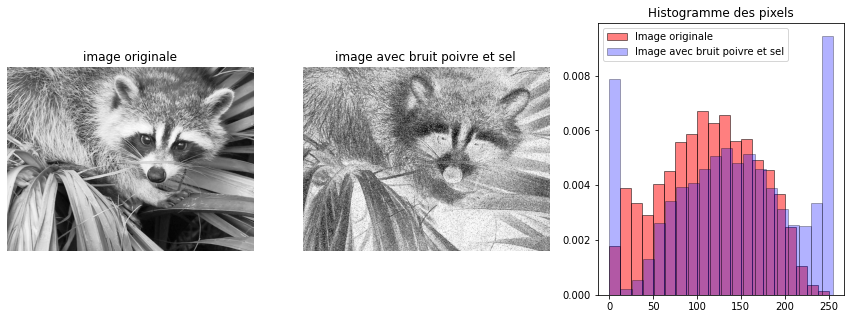

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].imshow(image, cmap='Greys_r')
axs[0].set_title('image originale')
axs[0].set_axis_off()

x = image.shape[0]
y = image.shape[1]
noise = np.random.randint(10, size = (x,y))
noise_image = np.where(noise == 0, 0, image*255)
noise_image = np.where(noise == 9, 255, noise_image)
noise_image = np.uint8(noise_image)
axs[1].imshow(noise_image, cmap='Greys_r')
axs[1].set_title('image avec bruit poivre et sel')
axs[1].set_axis_off()

axs[2].hist(image.flatten(), bins=20, density=True, alpha=.5, edgecolor='black', color='red', label='Image originale')
axs[2].hist(noise_image.flatten(), bins=20, density=True, alpha=0.3, edgecolor='black', color='blue', label='Image avec bruit poivre et sel')
axs[2].legend()
axs[2].set_title('Histogramme des pixels')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Histogramme des pixels')

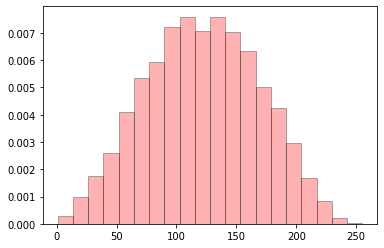